In [13]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
# 为了正常显示中文

mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.size'] = 12  # 字体大小
plt.rc('axes', unicode_minus=False)


In [3]:
# 加载数据集
boston = load_boston()
# 获取特征值和目标值
X, y = boston.data, boston.target
# 获取特征名称
feature_name = boston.feature_names
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
data_whole = np.concatenate([boston['data'], np.expand_dims(boston['target'], axis=1)], axis=-1)
data_whole = pd.DataFrame.from_dict(data_whole)

In [5]:
params = {'n_estimators': 500, # 弱分类器的个数
          'max_depth': 5,       # 弱分类器（CART回归树）的最大深度
          'min_samples_split': 5, # 分裂内部节点所需的最小样本数
          'learning_rate': 0.05,  # 学习率
          'loss': 'ls'}           # 损失函数：均方误差损失函数
GBDTreg = GradientBoostingRegressor(**params)
GBDTreg.fit(X_train, y_train)

C:\Users\fesia\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=5,
                          min_samples_split=5, n_estimators=500)

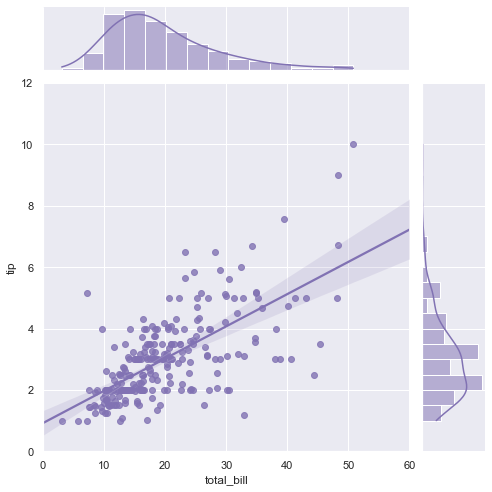

In [31]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

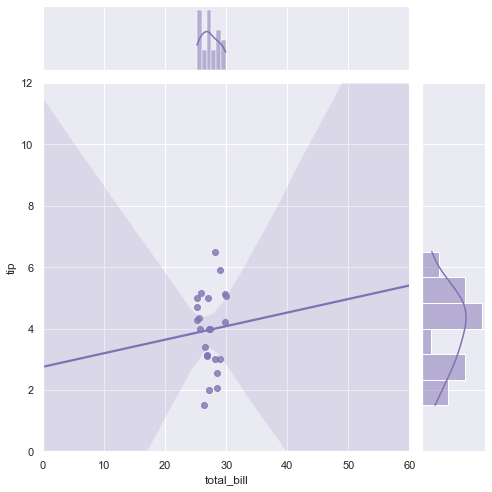

In [47]:
tip_range = tips[(tips['total_bill'] < 30) & (tips['total_bill'] > 25)]
g = sns.jointplot(x="total_bill", y="tip", data=tip_range,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

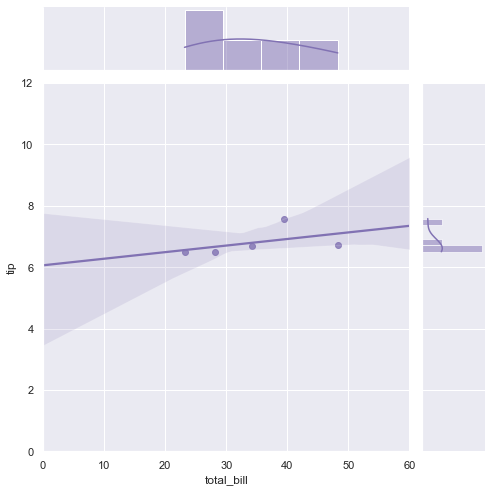

In [50]:
tip_range = tips[(tips['tip'] < 8) & (tips['tip'] > 6)]
g = sns.jointplot(x="total_bill", y="tip", data=tip_range,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [23]:
x = np.random.uniform(0,60,size=1000)

In [24]:
y = np.random.uniform(0,60,size=1000)

In [25]:
inps = {"x":x, "y":y}
inps = pd.DataFrame(inps)

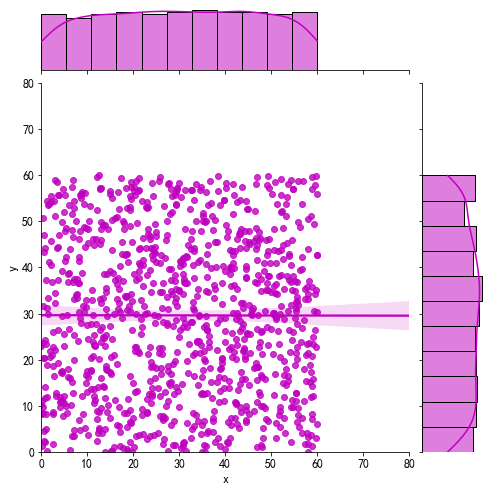

In [26]:
g = sns.jointplot(x="x", y="y", data=inps,
                  kind="reg", truncate=False,
                  xlim=(0, 80), ylim=(0, 80),
                  color="m", height=7)

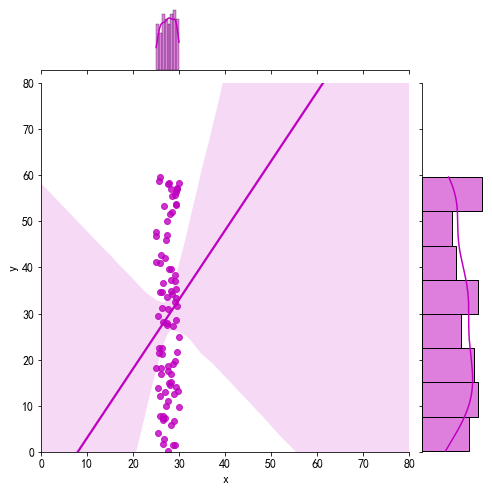

In [31]:
inps_ = inps[(inps['x'] < 30) & (inps['x'] > 25)]
g = sns.jointplot(x="x", y="y", data=inps_,
                  kind="reg", truncate=False,
                  xlim=(0, 80), ylim=(0, 80),
                  color="m", height=7)